# Experiments on CIC 2017 Dataset

In [2]:
!unzip MachineLearningCSV.zip

Archive:  MachineLearningCSV.zip
   creating: MachineLearningCVE/
  inflating: MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  


In [ ]:
import os
import numpy as np
dir = "/content/MachineLearningCVE/"
a = os.listdir(dir)
import pandas as pd
li = []

for filename in a:
    df = pd.read_csv(dir+filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
# frame = pd.read_csv(dir+a[3], index_col=None, header=0)

In [ ]:
frame[" Label"].value_counts()

BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name:  Label, dtype: int64

In [ ]:
frame

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2830738,53,155,2,2,88,120,44,44,44.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830739,59317,110,1,1,0,0,0,0,0.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830740,53,166,2,2,88,188,44,44,44.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2830741,54726,81,1,1,0,0,0,0,0.0,0.0,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
frame.columns

In [ ]:
X = frame.replace([np.inf, -np.inf], np.NaN)
X = X.dropna()

In [ ]:
# X = X.drop([" Bwd PSH Flags", " Bwd URG Flags","Fwd Avg Bytes/Bulk"," Fwd Avg Packets/Bulk"," Fwd Avg Bulk Rate", " Bwd Avg Bytes/Bulk"," Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate", " Label" ], axis=1)

In [ ]:
def replace_negative_values_with_zero(df):
    numeric_values = df.select_dtypes(include=[np.number]).columns.values
    
    columns = [c for c in numeric_values if df[df[c] < 0][c].count() > 0]
    for col in columns:
        mask = df[col] < 0
        df.loc[mask, col] = np.nan
        # mean = df[col].mean()
        df[col].fillna(0, inplace=True)
    return df      

In [ ]:
X = replace_negative_values_with_zero(X)

In [ ]:
import gc
gc.collect()

88

In [ ]:
len(frame[' Label'].value_counts())

15

## Supervised learning algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc = LabelEncoder()
label = X[" Label"]
multi = enc.fit_transform(label)

In [ ]:
from tqdm import tqdm 
bin = []

for i in tqdm(label):
    if i == "BENIGN":
        bin.append(0)
    else:
        bin.append(1)


100%|██████████| 2827876/2827876 [00:01<00:00, 1898444.37it/s]


In [ ]:
bin = np.array(bin)

In [ ]:
bin.shape

(2827876,)

In [ ]:
multi.shape

(2827876,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, bin, test_size=0.33, random_state=42)


In [ ]:
X_train = X_train.drop([" Bwd PSH Flags"," Fwd Header Length.1", " Bwd URG Flags","Fwd Avg Bytes/Bulk"," Fwd Avg Packets/Bulk"," Fwd Avg Bulk Rate", " Bwd Avg Bytes/Bulk"," Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate", " Label" ], axis=1)

In [ ]:
X_test = X_test.drop([" Bwd PSH Flags", " Bwd URG Flags","Fwd Avg Bytes/Bulk"," Fwd Avg Packets/Bulk"," Fwd Avg Bulk Rate"," Fwd Header Length.1", " Bwd Avg Bytes/Bulk"," Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate", " Label" ], axis=1)

In [ ]:
X = X.drop([" Bwd PSH Flags"," Fwd Header Length.1", " Bwd URG Flags","Fwd Avg Bytes/Bulk"," Fwd Avg Packets/Bulk"," Fwd Avg Bulk Rate", " Bwd Avg Bytes/Bulk"," Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate", " Label" ], axis=1)

In [ ]:
frame.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance


In [4]:
import os
import numpy as np
dir = "/content/MachineLearningCVE/"
a = os.listdir(dir)
import pandas as pd
li = []

for filename in a:
    df = pd.read_csv(dir+filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)
# frame = pd.read_csv(dir+a[3], index_col=None, header=0)

In [5]:
frame = frame.drop([" Destination Port"," Bwd PSH Flags"," Fwd Header Length.1", " Bwd URG Flags","Fwd Avg Bytes/Bulk"," Fwd Avg Packets/Bulk"," Fwd Avg Bulk Rate", " Bwd Avg Bytes/Bulk"," Bwd Avg Packets/Bulk","Bwd Avg Bulk Rate"], axis=1)

In [6]:
numeric_features = frame.dtypes[frame.dtypes != 'object'].index

In [7]:
import gc
gc.collect()

248

In [8]:
frame.replace([np.inf, -np.inf], np.NaN, inplace=True)
frame.fillna(0, inplace=True)

In [9]:

labelencoder = LabelEncoder()
frame.iloc[:, -1] = labelencoder.fit_transform(frame.iloc[:, -1])


In [10]:
X = frame.drop([' Label'], axis=1).values
y = frame.iloc[:, -1].values.reshape(-1,1)
y=np.ravel(y)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, test_size = 0.2, random_state = 0,stratify = y)

In [11]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([1818477,    1573,  102421,    8234,  184858,    4399,    4637,
           6350,       9,      29,  127144,    4718,    1206,      17,
            522]))

In [12]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(n_jobs=-1,sampling_strategy={8:1000,9:1500,13:1000, 14:1500}) # Create 1500 samples for the minority class "4"


In [13]:
X_train, y_train = smote.fit_resample(X_train, y_train)
# smote.

In [14]:
gc.collect()

267

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 

DecisionTreeClassifier(random_state=0)

Accuracy of DT: 0.9985940097041591
Precision of DT: 0.9986489952135451
Recall of DT: 0.9985940097041591
F1-score of DT: 0.9986118478652363
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.81      0.83      0.82       393
           2       1.00      1.00      1.00     25606
           3       0.99      0.99      0.99      2059
           4       1.00      1.00      1.00     46215
           5       0.97      0.95      0.96      1100
           6       0.99      0.99      0.99      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       0.54      1.00      0.70         7
          10       0.99      1.00      1.00     31786
          11       1.00      1.00      1.00      1179
          12       0.79      0.65      0.71       301
          13       0.25      0.50      0.33         4
          14       0.41      0.60      0.49       

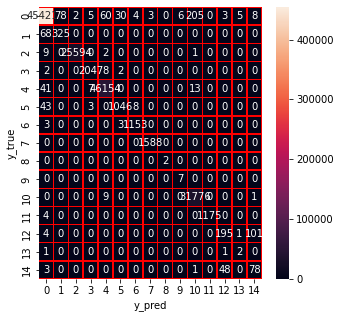

In [ ]:
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT: '+ str(dt_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of DT: '+(str(precision)))
print('Recall of DT: '+(str(recall)))
print('F1-score of DT: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Accuracy of RF: 0.9986399340103047
Accuracy of RF: 0.9986399340103047
Precision of RF: 0.9986529602733623
Recall of RF: 0.9986399340103047
F1-score of RF: 0.9986362011765464
Precision of RF: 0.9986529602733623
Recall of RF: 0.9986399340103047
F1-score of RF: 0.9986362011765464
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454620
           1       0.87      0.79      0.83       393
           2       1.00      1.00      1.00     25606
           3       1.00      0.99      1.00      2059
           4       1.00      1.00      1.00     46215
           5       0.96      0.98      0.97      1100
           6       1.00      1.00      1.00      1159
           7       1.00      1.00      1.00      1588
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         7
          10       0.99      1.00      1.00     31786
          11       1.00      0.99      1.00      1179
          12       

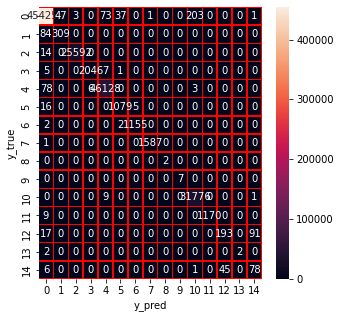

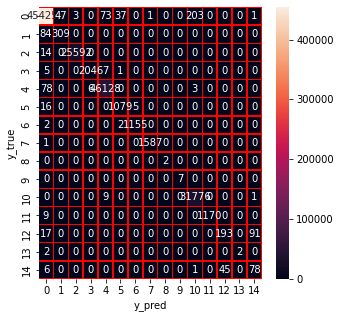

In [14]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF: '+ str(rf_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of RF: '+(str(precision)))
print('Recall of RF: '+(str(recall)))
print('F1-score of RF: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


Accuracy of XGBoost: 0.9805033657217447


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision of XGBoost: 0.9802283966898743
Recall of XGBoost: 0.9805033657217447
F1-score of XGBoost: 0.9789791764800838


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99    454620
           1       1.00      0.00      0.01       393
           2       1.00      0.98      0.99     25606
           3       0.99      0.71      0.83      2059
           4       0.97      0.87      0.91     46215
           5       0.93      0.67      0.78      1100
           6       1.00      0.46      0.63      1159
           7       1.00      0.98      0.99      1588
           8       1.00      1.00      1.00         2
           9       0.00      0.00      0.00         7
          10       0.99      0.99      0.99     31786
          11       1.00      0.49      0.66      1179
          12       1.00      0.04      0.08       301
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00       130

    accuracy                           0.98    566149
   macro avg       0.79      0.55      0.59    566149
weighted avg       0.98   

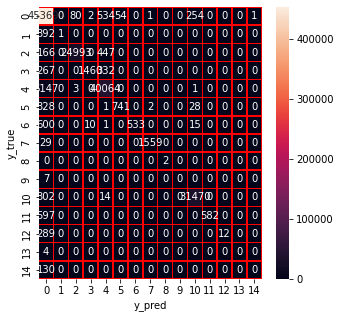

In [15]:
xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XGBoost: '+ str(xg_score))
precision,recall,fscore,none= precision_recall_fscore_support(y_true, y_predict, average='weighted') 
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))
print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


## Unsupervised learning algorithms

In [19]:
from sklearn.ensemble import IsolationForest
iso = IsolationForest()

In [21]:
iso.fit(X_train)

IsolationForest()

In [ ]:
iso.estimators_

In [27]:
# iso.classes_

In [22]:
preds = iso.predict(X_test)

In [33]:
y_true_outlier = []
for i in y_true:
    if (i==0):
        y_true_outlier.append(1)
    else:
        y_true_outlier.append(-1)
y_true_outlier = np.array(y_true_outlier)

In [34]:
y_true_outlier

array([ 1,  1, -1, ..., -1,  1,  1])

In [38]:
precision,recall,fscore,none= precision_recall_fscore_support(y_true_outlier, preds, average='weighted') 


In [39]:
print('Precision of XGBoost: '+(str(precision)))
print('Recall of XGBoost: '+(str(recall)))
print('F1-score of XGBoost: '+(str(fscore)))

Precision of XGBoost: 0.7592290527912318
Recall of XGBoost: 0.7934254056794237
F1-score of XGBoost: 0.7682143774513607


In [41]:
accuracy_score(y_true_outlier, preds)

0.7934254056794237

array([-1,  1,  1, ...,  1,  1,  1])